<a href="https://colab.research.google.com/github/LBrut/canada-wages/blob/main/Lanchel_Canadian_wages_and_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai --quiet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai import OpenAI
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Average_Hourly_Wages_Overall_Canadian.csv to Average_Hourly_Wages_Overall_Canadian.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Average_Hourly_Wages_Overall_Canadian.csv', sep='\t')

In [ ]:
selected_occupations = df[df['National Occupational Classification (NOC)'].isin(['Professional occupations in engineering [213]', 'Professional occupations in health [31]', 'Total employees, all occupations [00-95]'])]

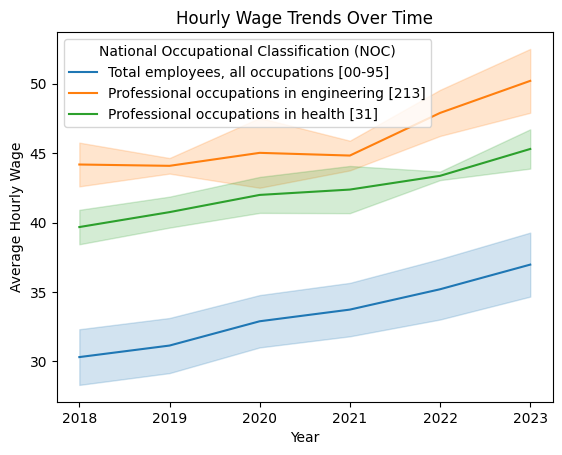

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=selected_occupations, x='REF_DATE', y='VALUE', hue='National Occupational Classification (NOC)')
plt.xlabel('Year')
plt.ylabel('Average Hourly Wage')
plt.title('Hourly Wage Trends Over Time')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files


Saving Average_Weekly_Wages_Full-time_Canadian.csv to Average_Weekly_Wages_Full-time_Canadian.csv
Saving Average_Weekly_Wages_Part-time_Canadian.csv to Average_Weekly_Wages_Part-time_Canadian.csv


In [ ]:
# Load the full-time and part-time wage datasets
df_full_time = pd.read_csv("Average_Weekly_Wages_Full-time_Canadian.csv")
df_part_time = pd.read_csv("Average_Weekly_Wages_Part-time_Canadian.csv")


In [ ]:
# Filter full-time employees
df_full_time = df_full_time[df_full_time["Type of work"] == "Full-time employees"].groupby("REF_DATE")["VALUE"].mean()

# Filter part-time employees
df_part_time = df_part_time[df_part_time["Type of work"] == "Part-time employees"].groupby("REF_DATE")["VALUE"].mean()


In [ ]:
# Combine the data
df_comparison = pd.DataFrame({
    "Full-time": df_full_time,
    "Part-time": df_part_time
}).reset_index()


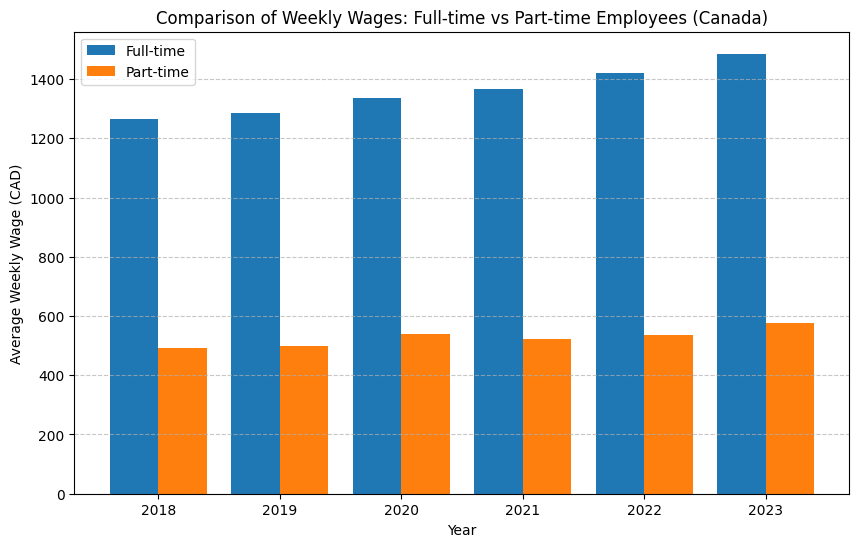

In [ ]:
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_comparison["REF_DATE"] - 0.2, df_comparison["Full-time"], width=0.4, label="Full-time", align="center")
plt.bar(df_comparison["REF_DATE"] + 0.2, df_comparison["Part-time"], width=0.4, label="Part-time", align="center")

plt.xlabel("Year")
plt.ylabel("Average Weekly Wage (CAD)")
plt.title("Comparison of Weekly Wages: Full-time vs Part-time Employees (Canada)")
plt.xticks(df_comparison["REF_DATE"])
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files


Saving Average_Hourly_Wages_Female_Canadian.csv to Average_Hourly_Wages_Female_Canadian.csv
Saving Average_Hourly_Wages_Male_Canadian.csv to Average_Hourly_Wages_Male_Canadian.csv


In [ ]:
# Load datasets
df_female = pd.read_csv("Average_Hourly_Wages_Female_Canadian.csv")
df_male = pd.read_csv("Average_Hourly_Wages_Male_Canadian.csv")


In [ ]:
# Add gender labels
df_female["Gender"] = "Female"
df_male["Gender"] = "Male"

# Combine both datasets
df_combined = pd.concat([df_female, df_male], ignore_index=True)


In [ ]:
# Compute average wages by occupation
avg_wages_by_occupation = df_combined.groupby("National Occupational Classification (NOC)")["VALUE"].mean()

# Identify the top 5 highest-paying occupations
top_5_occupations = avg_wages_by_occupation.nlargest(5).index

# Identify the bottom 3 lowest-paying occupations
bottom_3_occupations = avg_wages_by_occupation.nsmallest(3).index


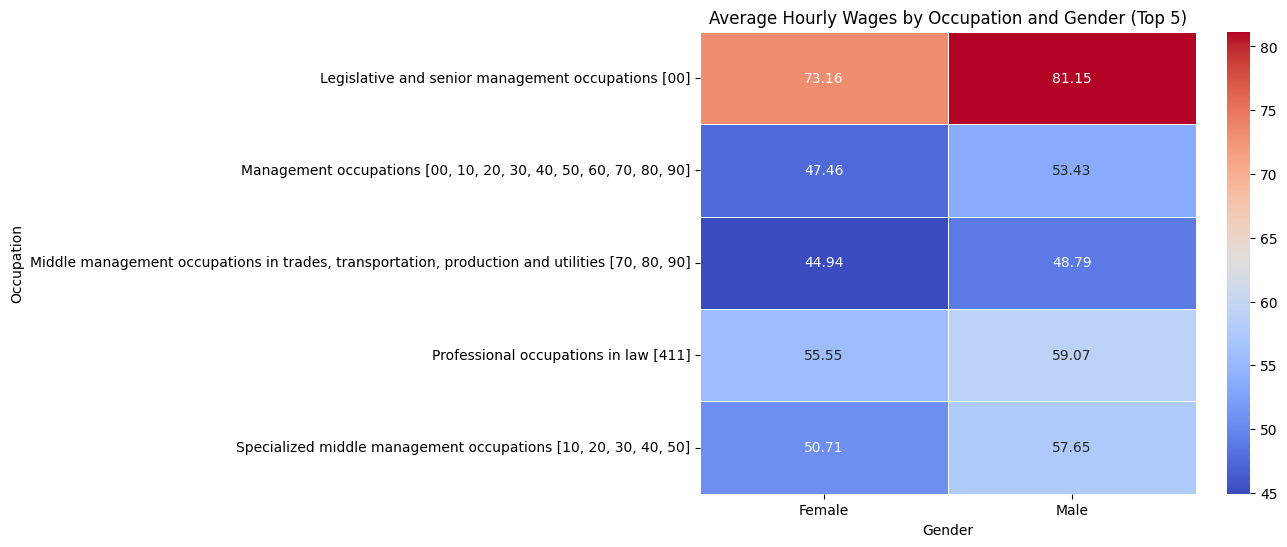

In [ ]:
# Filter for top 5 occupations
df_top_5 = df_combined[df_combined["National Occupational Classification (NOC)"].isin(top_5_occupations)]

# Prepare heatmap data
heatmap_data = df_top_5.pivot_table(
    index="National Occupational Classification (NOC)",
    columns="Gender",
    values="VALUE",
    aggfunc="mean"
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Average Hourly Wages by Occupation and Gender (Top 5)")
plt.ylabel("Occupation")
plt.xlabel("Gender")
plt.show()


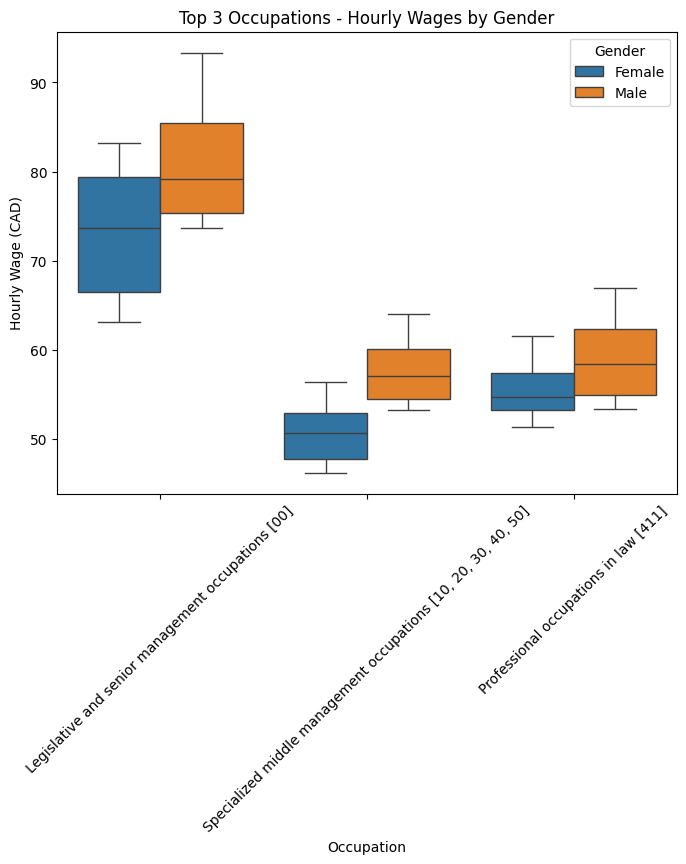

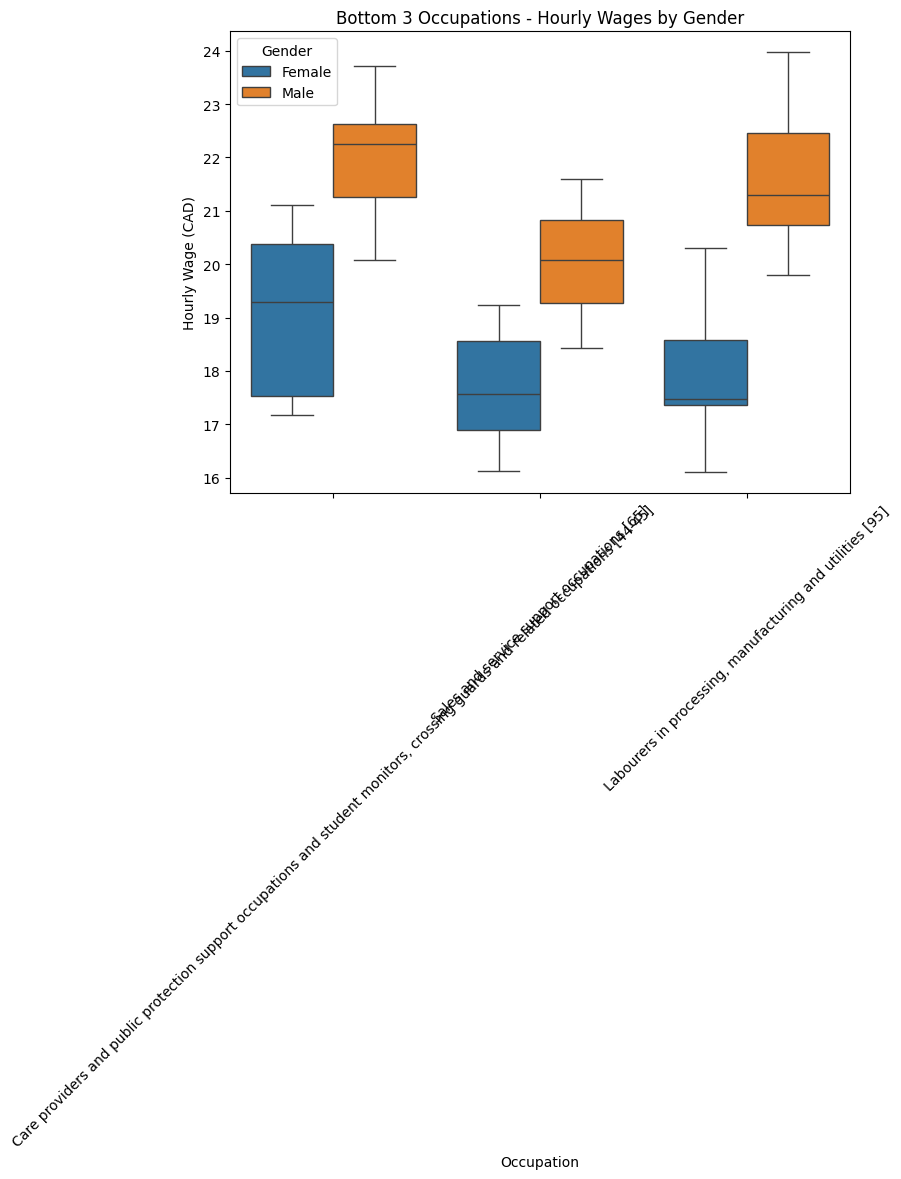

In [ ]:
# Filter data for boxplots (top 3 vs bottom 3 occupations)
df_top_3 = df_combined[df_combined["National Occupational Classification (NOC)"].isin(avg_wages_by_occupation.nlargest(3).index)]
df_bottom_3 = df_combined[df_combined["National Occupational Classification (NOC)"].isin(bottom_3_occupations)]

# Boxplot for Top 3 Occupations
plt.figure(figsize=(8, 6))
sns.boxplot(x="National Occupational Classification (NOC)", y="VALUE", hue="Gender", data=df_top_3)
plt.title("Top 3 Occupations - Hourly Wages by Gender")
plt.xticks(rotation=45)
plt.ylabel("Hourly Wage (CAD)")
plt.xlabel("Occupation")
plt.legend(title="Gender")
plt.show()

# Boxplot for Bottom 3 Occupations
plt.figure(figsize=(8, 6))
sns.boxplot(x="National Occupational Classification (NOC)", y="VALUE", hue="Gender", data=df_bottom_3)
plt.title("Bottom 3 Occupations - Hourly Wages by Gender")
plt.xticks(rotation=45)
plt.ylabel("Hourly Wage (CAD)")
plt.xlabel("Occupation")
plt.legend(title="Gender")
plt.show()


In [4]:
from google.colab import files
uploaded = files.upload()
api_key_path = 'openai.txt'

Saving openai.txt to openai.txt


In [5]:
# Read the API key
with open('openai.txt', 'r') as file:
    api_key = file.readline().strip()

# Import the 'os' module
import os

# Set the API key in the environment (optional if you pass the key directly to the client)
os.environ['OPENAI_API_KEY'] = api_key

# Import the OpenAI class from the openai library
from openai import OpenAI #

# Initialize the OpenAI client
client = OpenAI(api_key=api_key)

# Specify the model
model = "gpt-3.5-turbo"

# The text for analysis, Include both data and its description for context
text = """
Analyze and discuss the data on Canadian wages with a focus on three key aspects.

1. First, provide insight into overall wage trends over time, considering economic factors and policy impacts that have influenced these trends.
(Insert inferences and observations from EDA)

2. Second, detail the gender wage difference, highlighting the ongoing issue of pay equity between men and women across different sectors.
(Insert inferences and observations from EDA)

3. Lastly, explore the employment types to uncover disparities in earnings, especially focusing on how financial stability affects the hourly rates
(Insert inferences and observations from EDA)

Each of these points should form a separate paragraph, together building a coherent narrative for a data journalism piece.
"""

# Preparing messages for the model
messages = [
    {"role": "system", "content": "You are a data journalism assistant"},
    {"role": "user", "content": f"Write a small paragraph here to analyze this data:\n{text}. The goal is to interpret it in a way that's interesting for a Data journalism piece."}
]

# Sending the request to the model
response = client.chat.completions.create(
    model=model,
    messages=messages,
    temperature=0
)

# Extracting and printing the response
response_message = response.choices[0].message.content
print(response_message)

In analyzing Canadian wage data, several key aspects emerge. Firstly, when examining overall wage trends over time, it is evident that there has been a gradual increase in wages, albeit with fluctuations influenced by economic factors and policy changes. The data suggests that wages have generally kept pace with inflation, but certain sectors have experienced more significant growth due to shifts in demand and skill requirements. Government policies such as minimum wage adjustments and tax reforms have also played a role in shaping wage trends, highlighting the complex interplay between economic conditions and regulatory measures.

Secondly, a notable disparity in wages between genders is apparent, underscoring the ongoing issue of pay equity in Canada. Despite efforts to address this issue, women continue to earn less than men across various sectors, with the gap widening in certain industries. Factors such as occupational segregation, discrimination, and caregiving responsibilities c